<a href="https://colab.research.google.com/github/beserk561/notes_collab/blob/main/Math_Data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import imageio as io

import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import torch.nn.functional as F
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
image = io.imread("http://harborparkgarage.com/img/venues/pix/aquarium2.jpg")

In [ ]:
image.shape #if 3 channels then RGB if 4 then RGBA

(599, 1024, 3)

In [ ]:
image = image[:,:,0:3] #Remove the alpha channel if there

In [ ]:
image.shape

(599, 1024, 3)

In [ ]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(18, 10)
    plt.show()

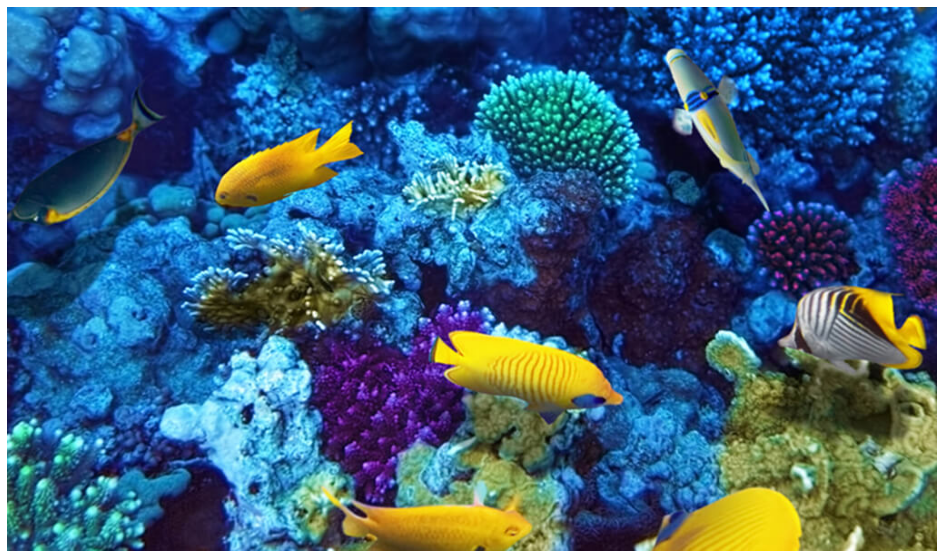

In [ ]:
plot(image)

In [ ]:
f = np.random.random((11,11,3))

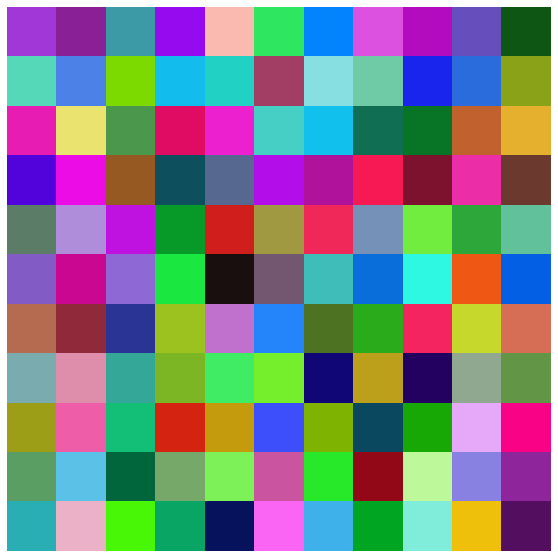

In [ ]:
plot(f)

In [ ]:
image = np.transpose(image, (2, 0, 1))

In [ ]:
f = np.random.random((1,3,11,11)).astype(np.float32) #b,c,h,w

In [ ]:
image = image[None,:,:,:]

In [ ]:
image.shape

(1, 3, 599, 1024)

In [ ]:
f =  torch.tensor(f)
image =  torch.tensor(image)

In [ ]:
image = image /255.0

In [ ]:
image.shape,f.shape

(torch.Size([1, 3, 599, 1024]), torch.Size([1, 3, 11, 11]))

In [ ]:
image2 = F.conv2d(image,f)

In [ ]:
image2 = image2.numpy()

In [ ]:
image2.shape

(1, 1, 589, 1014)

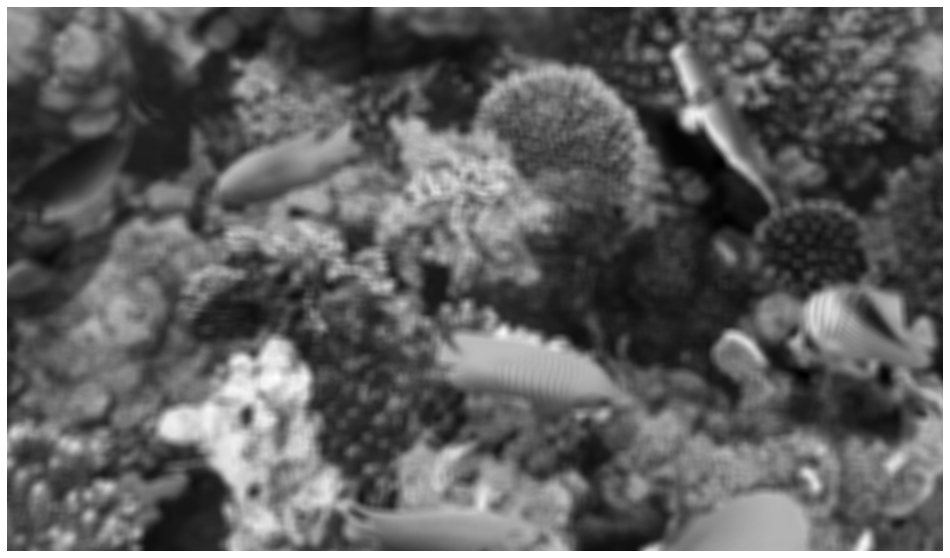

In [ ]:
plot(image2[0,0,:,:])

In [ ]:
def rgb2gray(rgb):

    gray = 0.2989 * rgb[:,:,0] + 0.5870 * rgb[:,:,1] + 0.1140 * rgb[:,:,2]

    return gray

In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [ ]:
image = io.imread("https://tinyurl.com/roadimage101")
image = rgb2gray(image)
image = image.astype(float)
image /= 255.0
plot(image)

In [ ]:
a = np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]])

In [ ]:
a

matrix([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]])

In [ ]:
f=a

In [ ]:
x=image

In [ ]:
f

matrix([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]])

In [ ]:
f[2,2]

In [ ]:
x2 = np.zeros(x.shape)

In [ ]:
for i in range(1,x.shape[0]-1):
    for j in range(1,x.shape[1]-1):
        
        x2[i,j] = f[0,0] * x[i-1,j-1]  \
        +         f[0,1] * x[i-1,j]    \
        +         f[0,2] * x[i-1,j+1]  \
        +         f[1,0] * x[i,j-1]    \
        +         f[1,1] * x[i,j]      \
        +         f[1,2] * x[i,j+1]    \
        +         f[2,0] * x[i+1,j-1]  \
        +         f[2,1] * x[i+1,j]    \
        +         f[2,2] * x[i+1,j+1]

In [ ]:
plot(x)

In [ ]:
plot(x2)

In [ ]:
def conv2(x,f):
    x2 = np.zeros(x.shape)
    for i in range(1,x.shape[0]-1):
        for j in range(1,x.shape[1]-1):
        
            x2[i,j] = f[0,0] * x[i-1,j-1] \
            +         f[0,1] * x[i-1,j] \
            +         f[0,2] * x[i-1,j+1] \
            +         f[1,0] * x[i,j-1] \
            +         f[1,1] * x[i,j] \
            +         f[1,2] * x[i,j+1] \
            +         f[2,0] * x[i+1,j-1] \
            +         f[2,1] * x[i+1,j] \
            +         f[2,2] * x[i+1,j+1]
            
    return x2

In [ ]:
a=np.matrix([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
# a=np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]])
# a=np.matrix([[1,1,1],[1,1,1],[1,1,1]])
# a=5*np.random.random((3,3))-5*np.random.random((3,3))

In [ ]:
a

matrix([[-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]])

In [ ]:
z = conv2(x,a)

In [ ]:
plot(x)

In [ ]:
plot(z)

In [ ]:
2*np.random.random((3,3))-1

array([[ 0.19683084, -0.89891936,  0.63027596],
       [-0.71886672, -0.06291273,  0.25863057],
       [-0.00804091,  0.51799257,  0.15058037]])

[[ 0.7357603  -0.55701392 -0.32196863]
 [-0.08535341 -0.73838037 -0.70411188]
 [-0.27265741 -0.50970596  0.36086887]]


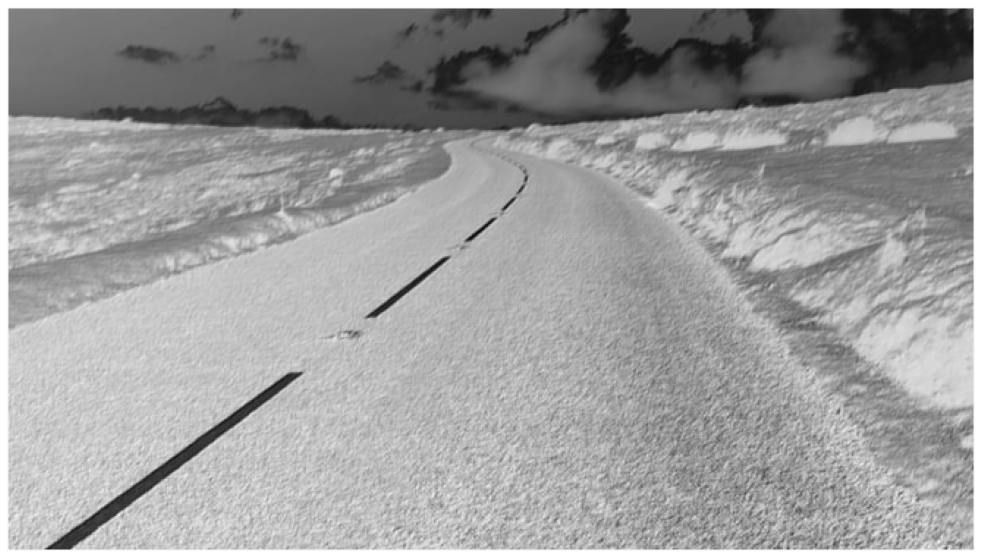

[[ 0.25141259  0.80907464 -0.03186745]
 [-0.0646821   0.92716735  0.37687749]
 [-0.92694338  0.34349004 -0.51232449]]


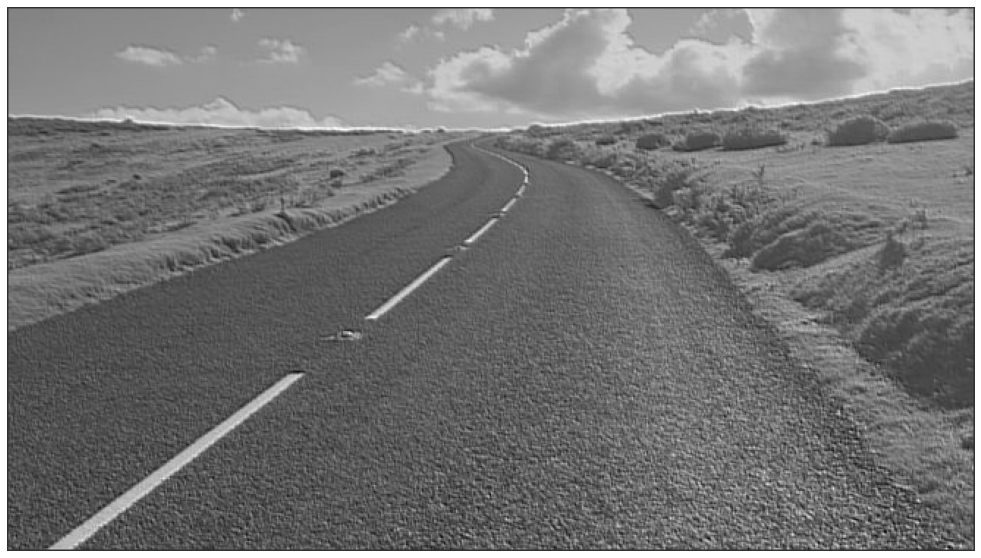

[[-0.84570335  0.55580719  0.68907363]
 [-0.40189456 -0.20667547 -0.76137728]
 [-0.90234407  0.06791163 -0.99283126]]


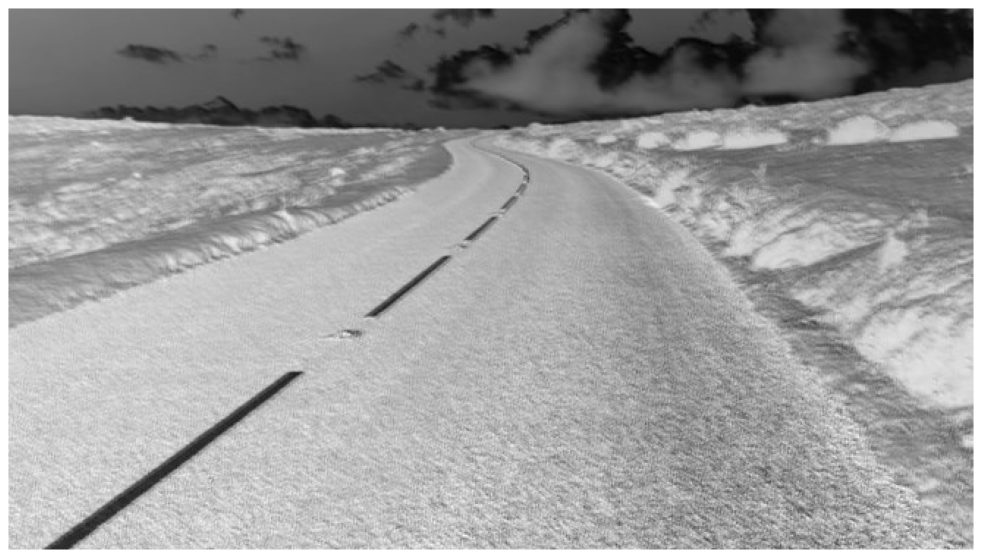

[[ 0.63833834 -0.0699992  -0.45517997]
 [-0.79472023  0.08811273 -0.53246847]
 [-0.16092066  0.53309189 -0.86676818]]


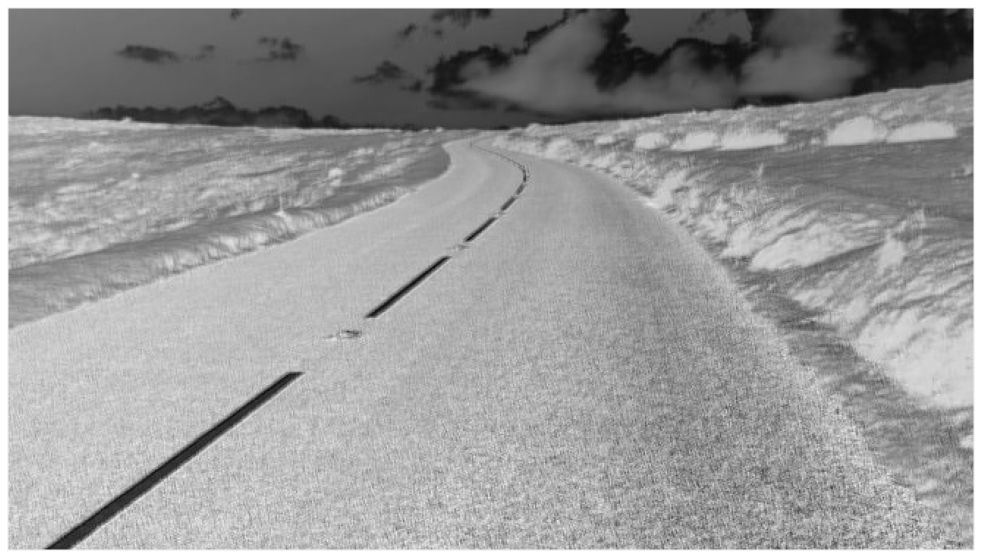

[[ 0.47819569 -0.72235832 -0.32099918]
 [ 0.33632082  0.99412957  0.44947995]
 [ 0.55265203  0.06738238 -0.56616432]]


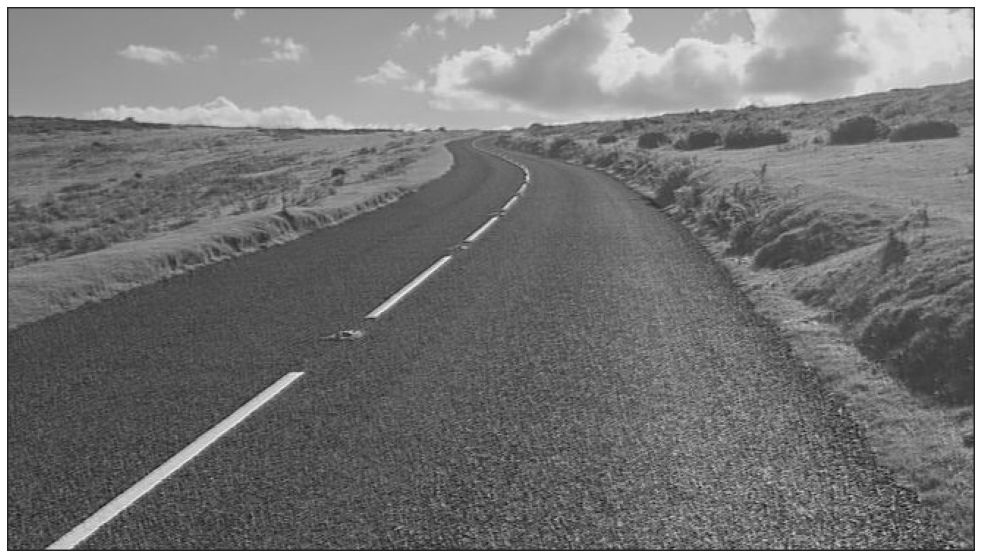

[[-0.18835775 -0.53675464  0.51548854]
 [ 0.82035622  0.44135903  0.3156411 ]
 [-0.84909744  0.72874144 -0.6276632 ]]


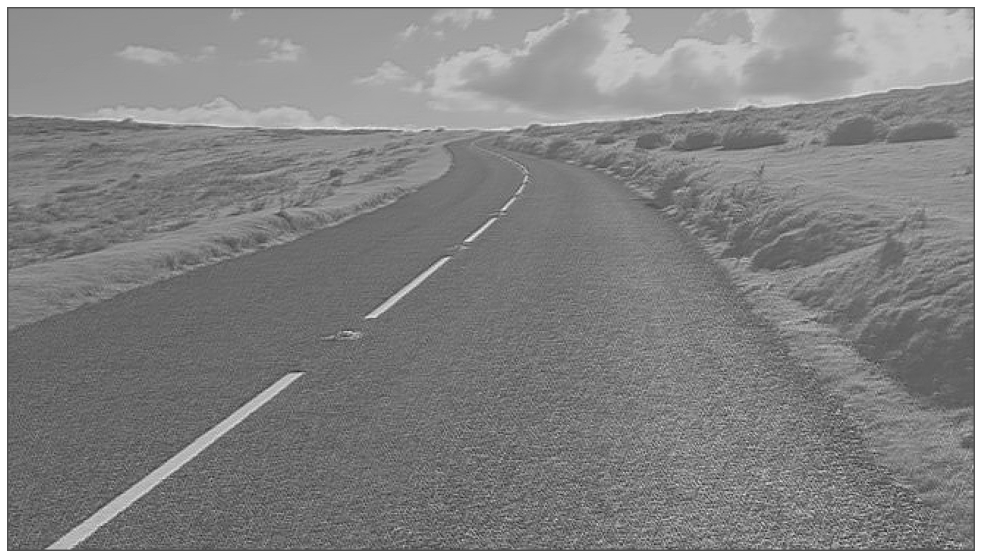

[[-0.98031048  0.24336332  0.63819898]
 [-0.9965276   0.21880624 -0.60361975]
 [-0.87955048  0.24402277 -0.01887078]]


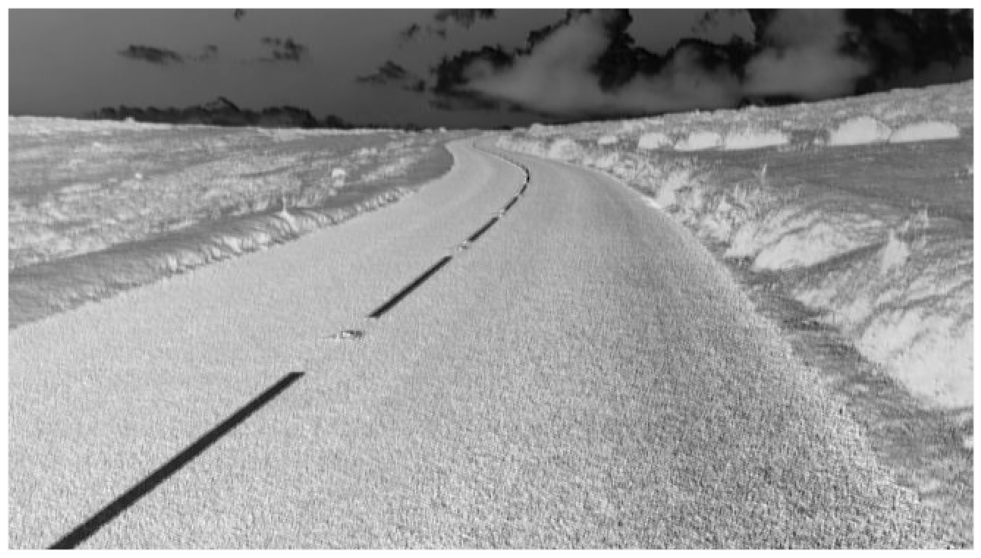

[[ 0.81270954  0.66559913  0.65148058]
 [-0.00667329 -0.10922676  0.90837892]
 [-0.13539182 -0.6350048  -0.36365865]]


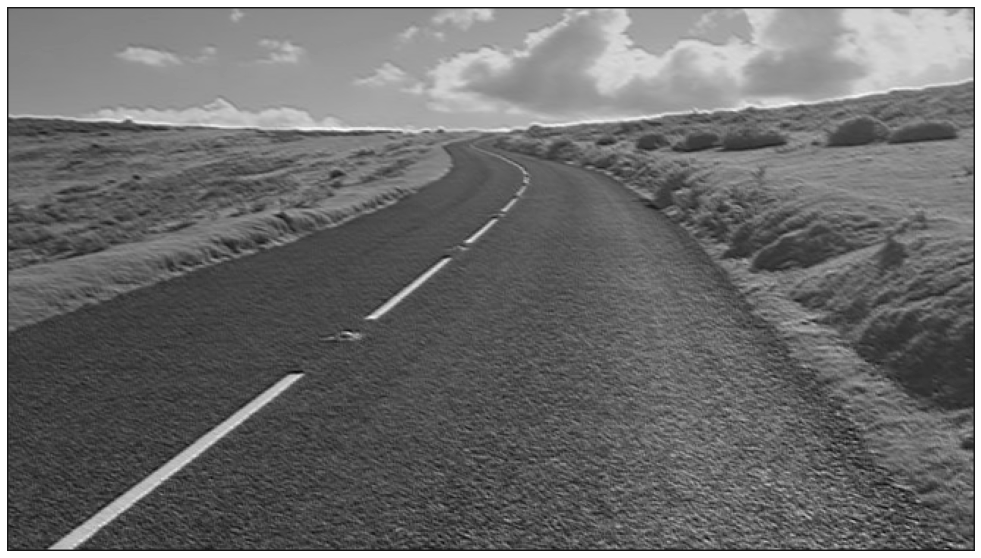

[[ 0.41934179  0.77267352  0.55378856]
 [ 0.78418398  0.51059858  0.85989332]
 [ 0.4245481  -0.94798728 -0.17154264]]


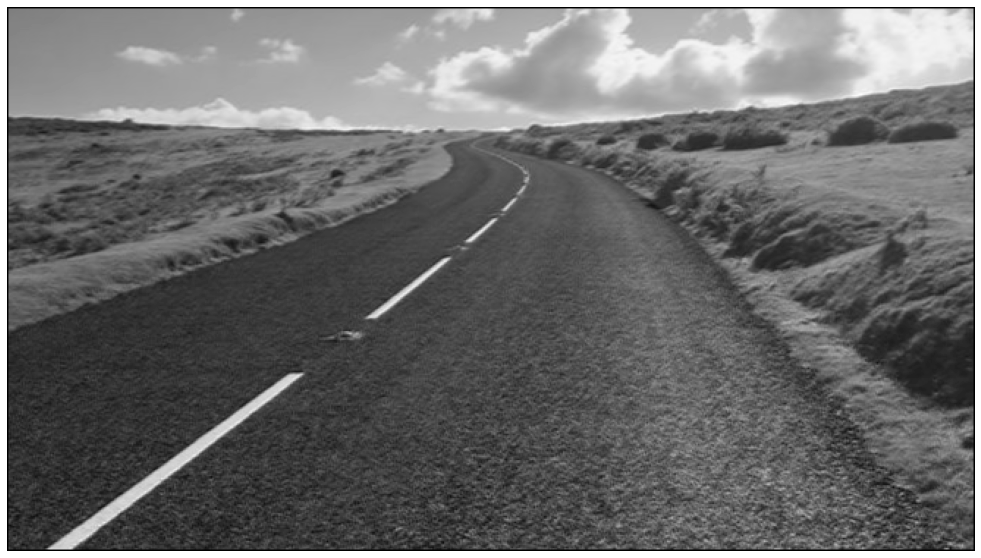

In [ ]:
for i in range(9):
    a = 2*np.random.random((3,3))-1
    print(a)
    z=conv2(x,a)
    plot(z)

In [ ]:
import time

In [ ]:
# import time
# start_time = time.time()
# print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
x.shape

(371, 660)

In [ ]:
a = 2*np.random.random((9,3,3))-1
start_time = time.time()



for i in range(9):
    
    z=conv2(x,a[i,:,:])




print("Seconds: ",(time.time() - start_time))

Seconds:  8.583009004592896


In [ ]:
from scipy import signal

In [ ]:
a = 2*np.random.random((9,3,3))-1
start_time = time.time()
for i in range(9):
    
    z = signal.convolve2d(x,a[i,:,:])

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.12199592590332031 seconds ---


In [ ]:
x.shape

(371, 660)

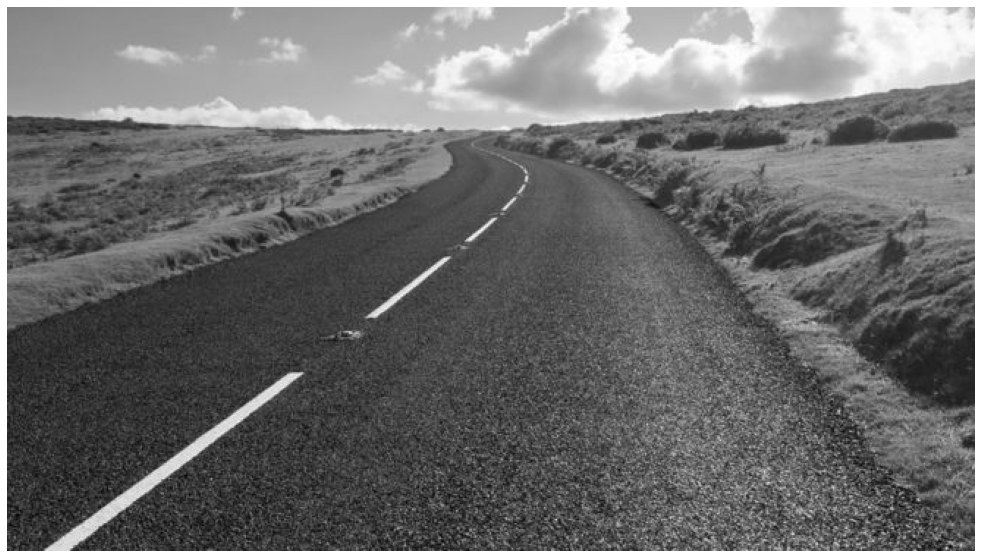

In [ ]:
plot(x)

In [ ]:
x3=x[::2,::2]

In [ ]:
a = np.arange(10)

In [ ]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
a[::2]

array([0, 2, 4, 6, 8])

In [ ]:
x3.shape

(186, 330)

In [ ]:
plot(x3)

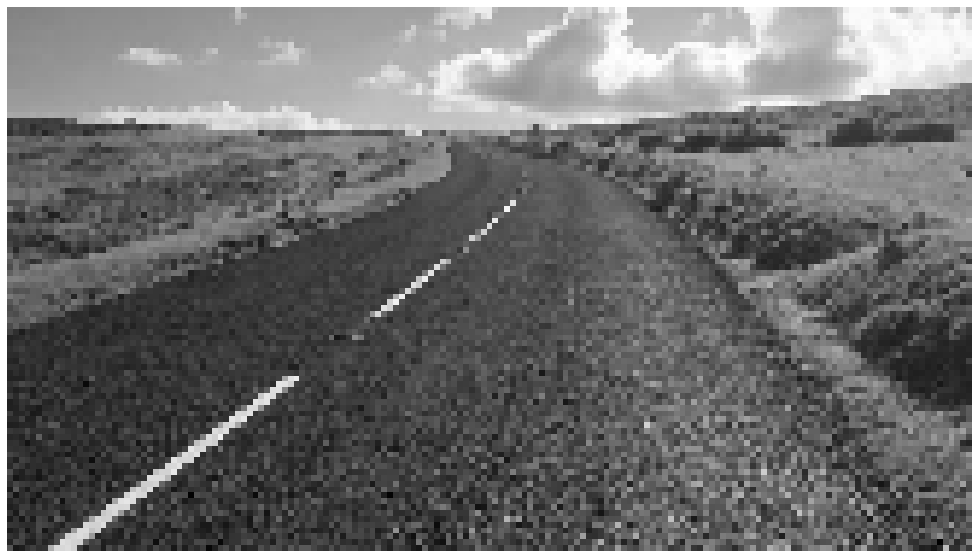

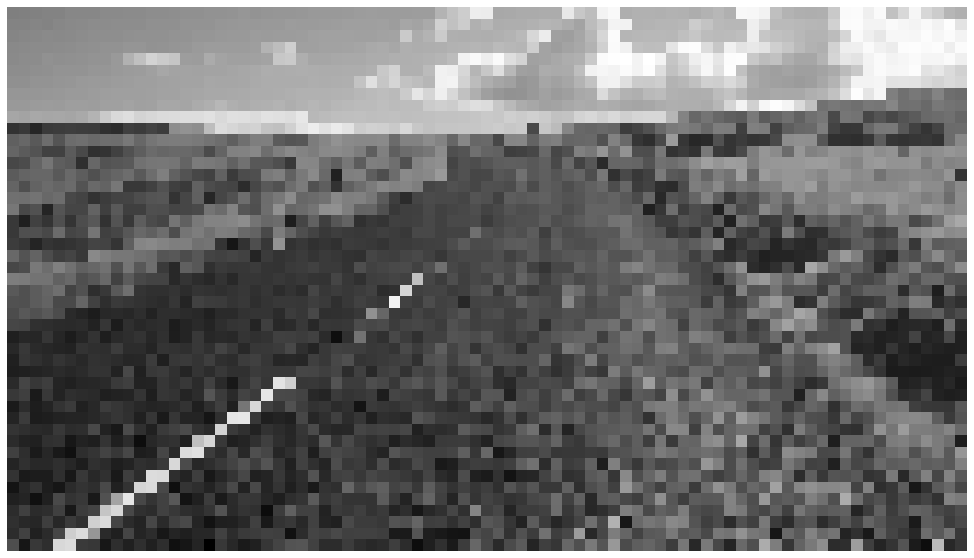

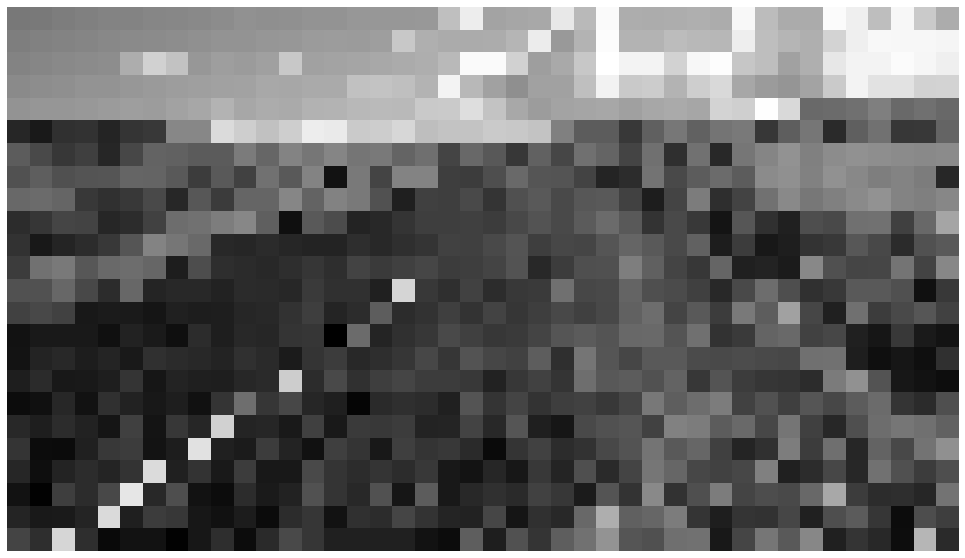

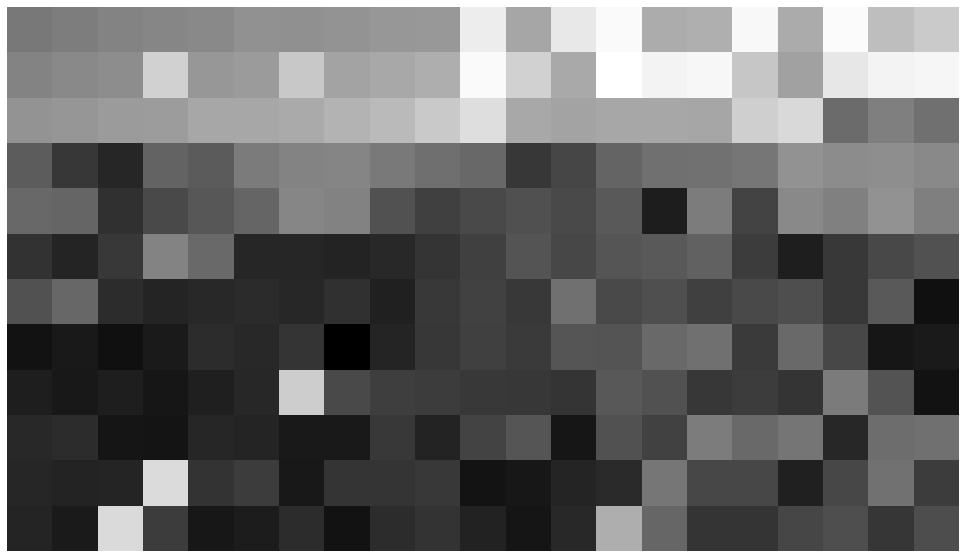

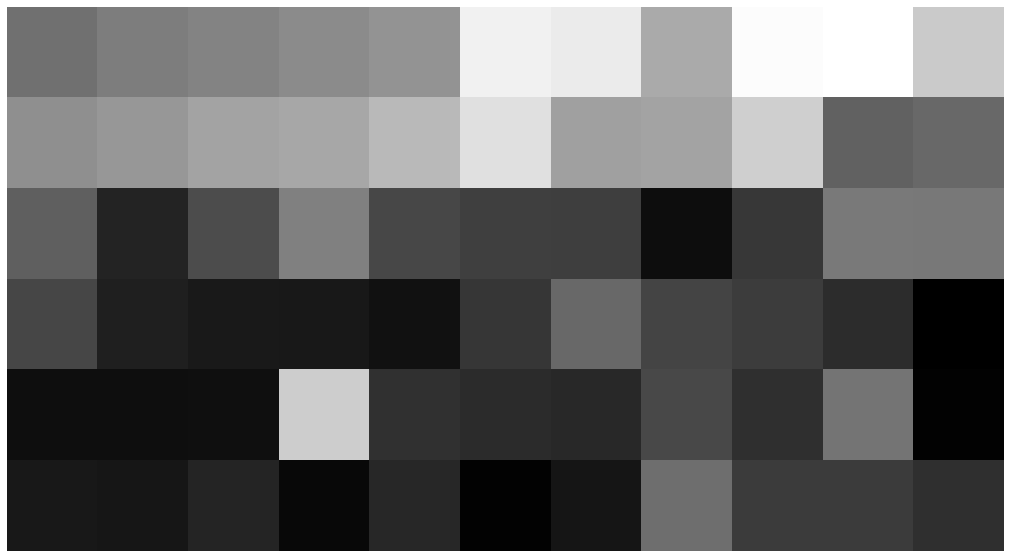

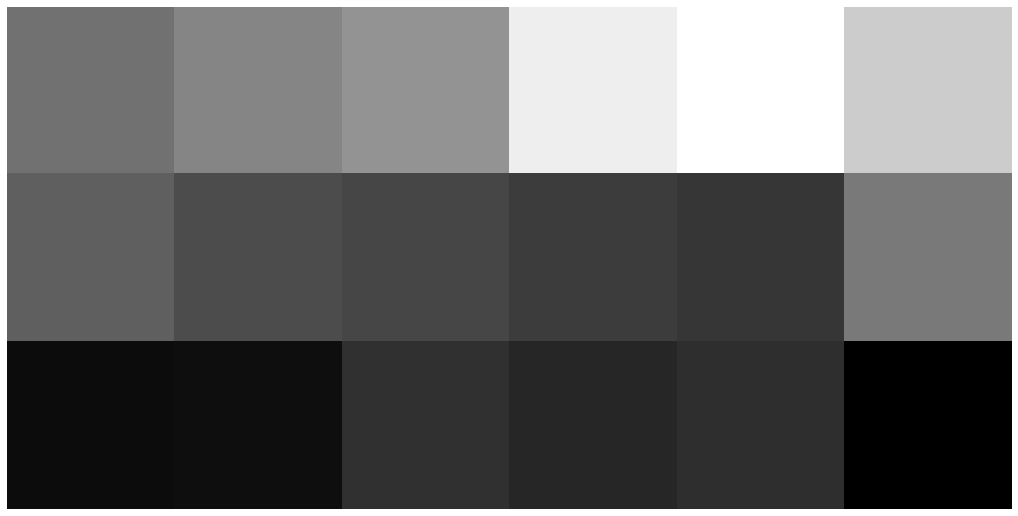

In [ ]:
for i in range(6):
    x3=x3[::2,::2]
    plot(x3)